Analysing sarc_tweets_2_4 dataset and not_sarc_with_emojis dataset, after cleaning them. similar to reddit analysis.

In [ ]:
! gdown 1GHD3RuN6NaSYjQWw16UAvrNhl9fBOkpG
! gdown 1yoB2WZwW3YIefSqaS-ThsBuXN-unH9_S

Downloading...
From: https://drive.google.com/uc?id=1GHD3RuN6NaSYjQWw16UAvrNhl9fBOkpG
To: /content/sarc_tweets_2_4.csv
100% 291M/291M [00:03<00:00, 75.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1yoB2WZwW3YIefSqaS-ThsBuXN-unH9_S
To: /content/not_sarc_with_emojis2.csv
100% 187M/187M [00:03<00:00, 61.6MB/s]


In [ ]:
! pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 197 kB 6.9 MB/s 
  Created wheel for emoji: filename=emoji-2.0.0-py3-none-any.whl size=193022 sha256=db12e994035aaecb937cd866b4f570f62b93c8be5848f536e82e7ae6ddf5a823
  Stored in directory: /root/.cache/pip/wheels/ec/29/4d/3cfe7452ac7d8d83b1930f8a6205c3c9649b24e80f9029fc38
Successfully built emoji


In [ ]:
import re

def clean_com(com):
  com = com.lower()
  com = re.sub(r'http\S+', '', com)
  com = re.sub("@[A-Za-z0-9_]+","", com)
  com = re.sub("#[A-Za-z0-9_]+","", com)
  com = re.sub("rt :","", com)
  com = re.sub("^ +","", com)
  com = re.sub(" +$","", com)
  com = re.sub("\n","", com)
  com = re.sub(" +"," ", com)
  return com

In [ ]:
import emoji

def extract_emojis(s):
  return [d['emoji'] for d in emoji.emoji_list(s)]

In [ ]:
import pandas as pd
data = pd.read_csv('sarc_tweets_2_4.csv')

tweets = data['text']
print("At first:", len(tweets))

tweets = list(dict.fromkeys(tweets))
print("After removing duplicates:",len(tweets))

s_tweets = [x for x in tweets if ('#sarcasm' in x) or ('#sarcastic' in x)]
print("with #sarcasm and #sarcastic:", len(s_tweets))

c_tweets = [clean_com(x) for x in s_tweets]

c_tweets = [x for x in c_tweets if ('sarcasm' not in x) and ('sarcastic' not in x)]
print("Tweets without sarcasm or sarcastic:", len(c_tweets))

c_tweets_with_emo = [x for x in c_tweets if len(extract_emojis(x)) != 0]
print("Tweets with emojis:", len(c_tweets_with_emo))

c_tweets_no_emo = [x for x in c_tweets if len(extract_emojis(x)) == 0]
print("Tweets without emojis:", len(c_tweets_no_emo))

c_tweets_with_1_emo = [x for x in c_tweets_with_emo if len(extract_emojis(x)) == 1]
print("Tweets with 1 emoji:", len(c_tweets_with_1_emo))

At first: 2394423
After removing duplicates: 2349026
with #sarcasm and #sarcastic: 1922698
Tweets without sarcasm or sarcastic: 1909704
Tweets with emojis: 154471
Tweets without emojis: 1755233
Tweets with 1 emoji: 99420


In [ ]:
import pandas as pd
data = pd.read_csv('not_sarc_with_emojis2.csv')

not_sarc_tweets = data['text']
print("At first:", len(not_sarc_tweets))

not_sarc_tweets = list(dict.fromkeys(not_sarc_tweets))
print("After removing duplicates:",len(not_sarc_tweets))

n_c_tweets = [clean_com(x) for x in not_sarc_tweets]

n_c_tweets = [x for x in n_c_tweets if ('sarcasm' not in x) and ('sarcastic' not in x)]
print("Tweets without sarcasm or sarcastic:", len(n_c_tweets))

n_c_tweets_with_emo = [x for x in n_c_tweets if len(extract_emojis(x)) != 0]
print("Tweets with emojis:", len(n_c_tweets_with_emo))

n_c_tweets_no_emo = [x for x in n_c_tweets if len(extract_emojis(x)) == 0]
print("Tweets without emojis:", len(n_c_tweets_no_emo))

n_c_tweets_with_1_emo = [x for x in n_c_tweets_with_emo if len(extract_emojis(x)) == 1]
print("Tweets with 1 emoji:", len(n_c_tweets_with_1_emo))

At first: 1480211
After removing duplicates: 1474545
Tweets without sarcasm or sarcastic: 1473855
Tweets with emojis: 1473832
Tweets without emojis: 23
Tweets with 1 emoji: 767428


In [ ]:
from collections import Counter

sarc_emojis = []
not_sarc_emojies = []

for x in c_tweets_with_1_emo:
  sarc_emojis += extract_emojis(x)

for x in n_c_tweets_with_1_emo:
  not_sarc_emojies += extract_emojis(x)

c1 = Counter(sarc_emojis)
c2 = Counter(not_sarc_emojies)
print("sarcastic: total ",len(sarc_emojis),c1.most_common(20))
print("not sarcs: total ",len(not_sarc_emojies),c2.most_common(20))

sarcastic: total  99420 [('😒', 16517), ('😂', 7111), ('👍', 5081), ('👌', 4761), ('🙄', 3853), ('😑', 3293), ('😊', 2672), ('😉', 2518), ('😏', 2502), ('😁', 1948), ('😔', 1942), ('😡', 1610), ('😐', 1591), ('😳', 1558), ('😜', 1425), ('😄', 1296), ('👏', 1242), ('☺', 1153), ('🤔', 1135), ('😃', 1122)]
not sarcs: total  767428 [('😂', 302945), ('😊', 58009), ('🤔', 53247), ('🙄', 49207), ('👍', 47329), ('😁', 38624), ('😉', 34732), ('😔', 33755), ('😳', 21765), ('😒', 20703), ('😏', 19879), ('😄', 12909), ('👌', 11416), ('😃', 11274), ('👏', 10978), ('😜', 10820), ('😡', 10503), ('😐', 9913), ('😑', 7580), ('☺', 1840)]


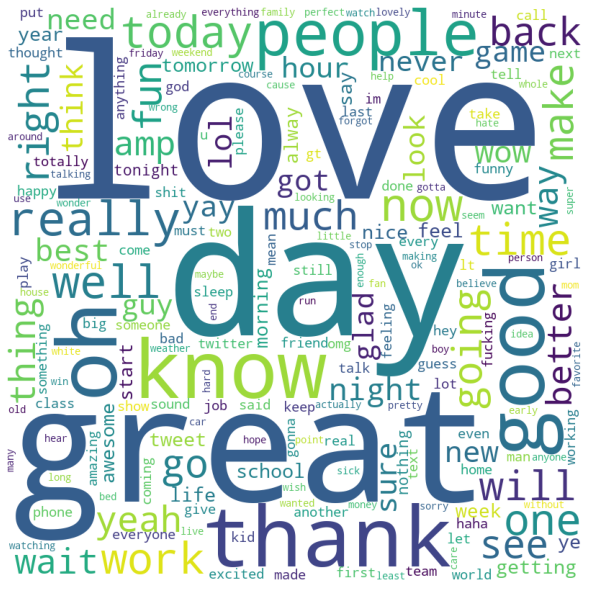

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

sarc_words = ''
stopwords = set(STOPWORDS)

for sarc_com in c_tweets:

    tokens = [w.lower() for w in sarc_com.split()]         
    sarc_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                collocations = False,
                stopwords = stopwords,
                min_font_size = 10).generate(sarc_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

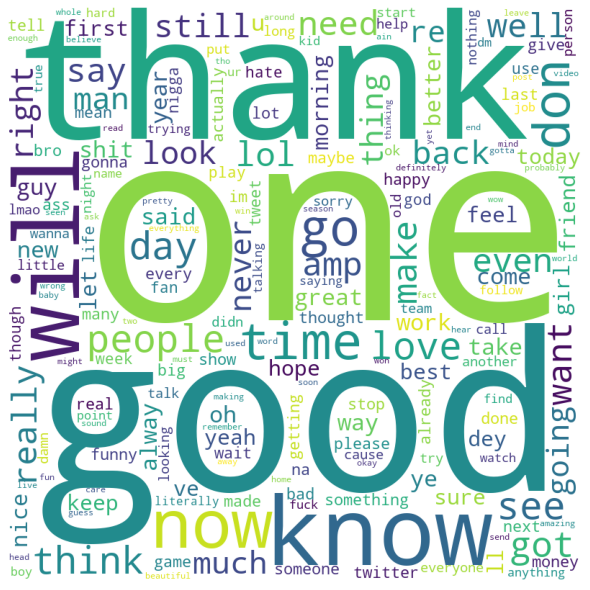

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

sarc_words = ''
stopwords = set(STOPWORDS)

for sarc_com in n_c_tweets:

    tokens = [w.lower() for w in sarc_com.split()]         
    sarc_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                collocations = False,
                stopwords = stopwords,
                min_font_size = 10).generate(sarc_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [ ]:
X = []
Y = []
for com in c_tweets[:len(n_c_tweets)]:
  X.append(com)
  Y.append(1)
for com in n_c_tweets:
  X.append(com)
  Y.append(0)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display="diagram")


x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state=42)
lr_clf = Pipeline([('tfidf', TfidfVectorizer(ngram_range=(1,2))),('clf',  LogisticRegression(penalty = 'l2', random_state= 42, solver='liblinear'))])
lr_clf.fit(x_train,y_train)
y_pred = lr_clf.predict(x_test)


In [ ]:
import pandas as pd

print(f"The accuracy on the training set is: {lr_clf.score(x_train,y_train)}")
print(f"The accuracy on the test set is:  {lr_clf.score(x_test,y_test)}")

report = classification_report(y_test,y_pred, output_dict=True, target_names=["not sarcastic", "sarcastic"])
report = pd.DataFrame(report)
report = report.rename({"1": "Sarcastic Comments", "0": "Non Sarcastic Comments"})
report

The accuracy on the training set is: 0.8636292497405895
The accuracy on the test set is:  0.8149412154240305


,not sarcastic,sarcastic,accuracy,macro avg,weighted avg
precision,0.815068,0.814814,0.814941,0.814941,0.814941
recall,0.815371,0.814511,0.814941,0.814941,0.814941
f1-score,0.815219,0.814662,0.814941,0.814941,0.814941
support,368950.000000,367978.000000,0.814941,736928.000000,736928.000000


In [ ]:
! pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 4.3 MB/s 
     |████████████████████████████████| 133 kB 48.9 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=971b6cdc2600d6a651225265ff04dec54d88643890dd0ff1917c9001a7fe71d1
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is inco

In [ ]:
import eli5
eli5.explain_weights(lr_clf)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Weight?,Feature
+14.562,yay
+12.156,love when
+11.257,obama
+10.885,it when
+10.502,snow
+9.849,homework
+9.666,just love
+9.567,hashtag
+9.556,or anything
+8.789,love how


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


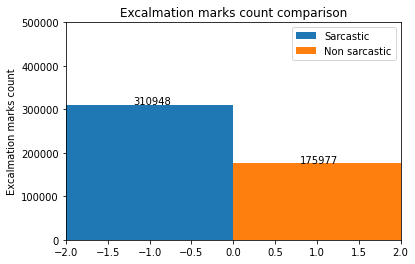

In [ ]:
import matplotlib.pyplot as plt

sarc_excal_count = 0
non_sarc_excal_count = 0
for com in c_tweets[:len(n_c_tweets)]:
  if '!' in com:
      sarc_excal_count += 1
for com in n_c_tweets:
  if '!' in com:
    non_sarc_excal_count += 1


fig, ax = plt.subplots()
plt.bar(-1, sarc_excal_count, 2, label='Sarcastic')
plt.bar(1, non_sarc_excal_count, 2, label='Non sarcastic')
plt.axis([-2, 2, 0, 500000])
ax.set_xticks([-1,1], ['sarcastic', 'non sarcastic'])

ax.annotate(str(sarc_excal_count),(-1.2,sarc_excal_count+100))
ax.annotate(str(non_sarc_excal_count),(0.8,non_sarc_excal_count+100))
ax.set_ylabel('Excalmation marks count')
ax.set_title('Excalmation marks count comparison')
ax.legend()

plt.show()

In [ ]:
! pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 7.3 MB/s 
     |████████████████████████████████| 6.6 MB 36.2 MB/s 
     |████████████████████████████████| 596 kB 42.1 MB/s 
     |████████████████████████████████| 101 kB 11.4 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
from transformers import pipeline

model_path = f"cardiffnlp/twitter-roberta-base-sentiment-latest"
a = [x for x in c_tweets if len(x) < 300]
b = [x for x in n_c_tweets if len(x) < 300]

classifier = pipeline("sentiment-analysis", model=model_path, tokenizer=model_path,max_length=512, truncation=True)
sarc_sentiment = classifier(a[:9000])
non_sarc_sentiment = classifier(b[:9000])

sarc_pos = [x['score'] for x in sarc_sentiment if x['label'] == 'Positive']
sarc_neg = [x['score'] for x in sarc_sentiment if x['label'] == 'Negative']
sarc_neu = [x['score'] for x in sarc_sentiment if x['label'] == 'Neutral']
non_sarc_pos = [x['score'] for x in non_sarc_sentiment if x['label'] == 'Positive']
non_sarc_neg = [x['score'] for x in non_sarc_sentiment if x['label'] == 'Negative']
non_sarc_neu = [x['score'] for x in non_sarc_sentiment if x['label'] == 'Neutral']


Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
import numpy as np

print("Positive sarcasm:    ",len(sarc_pos), "  Avarage score:", np.mean(sarc_pos))
print("Neutral sarcasm:     ",len(sarc_neu), "  Avarage score:", np.mean(sarc_neg))
print("Negative sarcasm:    ",len(sarc_neg), "  Avarage score:", np.mean(sarc_neg))
print("Positive non sarcasm:",len(non_sarc_pos), "  Avarage score:", np.mean(non_sarc_pos))
print("Neutral non sarcasm: ",len(non_sarc_neu), "  Avarage score:", np.mean(non_sarc_pos))
print("Negative non sarcasm:",len(non_sarc_neg), "  Avarage score:", np.mean(non_sarc_neg))

Positive sarcasm:     2201   Avarage score: 0.8043538534955402
Neutral sarcasm:      2849   Avarage score: 0.7513192318662812
Negative sarcasm:     3950   Avarage score: 0.7513192318662812
Positive non sarcasm: 3582   Avarage score: 0.8588528267619066
Neutral non sarcasm:  2850   Avarage score: 0.8588528267619066
Negative non sarcasm: 2568   Avarage score: 0.7392628467946409
